In [113]:
using JLD, Plots, LaTeXStrings

In [114]:
data = JLD.load("../data/QMC/BiHub_Lx6Ly6_LA16_U8.0.jld")

tz = data["tz"]
S2, S2_err = data["S2_val"], data["S2_err"]
S2n, S2n_err = data["S2n_val"], data["S2n_err"]
S2m, S2m_err = data["S2m_val"], data["S2m_err"];
Hm, Hm_err = data["Hm_val"], data["Hm_err"];
Hn, Hn_err = data["Hn_val"], data["Hn_err"];

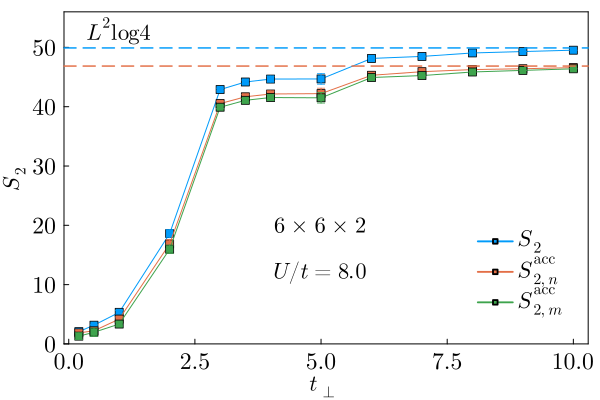

In [115]:
cur_colors = get_color_palette(:auto, plot_color(:white))

plt = plot(
    tz, S2, yerror = S2_err,
    label=L"S_2",
    xlabel = L"t_{\perp}", ylabel=L"S_2",
    lc=cur_colors[1], mc=cur_colors[1],
    marker=(:square, 4), 
    yticks=0:10:50,
    ylim=(0,56),
    fontfamily="Computer Modern",
    legendfontsize = 15,
    guidefontsize = 15,
    tickfontsize = 15,
    framestyle=:box, grid=:false,
    legend=:bottomright,
    foreground_color_legend = nothing
)

plot!(
    tz, S2n, yerror = S2n_err,
    label=L"S^{\mathrm{acc}}_{2,n}",
    lc=cur_colors[2], mc=cur_colors[2],
    marker=(:square, 4)
)

plot!(
    tz, S2m, yerror = S2m_err,
    label=L"S^{\mathrm{acc}}_{2,m}",
    lc=cur_colors[3], mc=cur_colors[3],
    marker=(:square, 4)
)

hline!(plt, [36*log(4)], line=(1.5, :dash, cur_colors[1]), label="")

hline!(plt, [36*1.301469], line=(1.5, :dash, cur_colors[2]), label="")

annotate!(5, 20, L"6\times 6\times 2", 15)
annotate!(5, 12, L"U/t=8.0", 15)
annotate!(1, 52.8, text(L"L^2 \log4", 15, :black))

In [116]:
savefig("../figures/EE_bilayerHubbard_U8.0.pdf")
savefig("../figures/EE_bilayerHubbard_U8.0.svg")
savefig("../figures/EE_bilayerHubbard_U8.0.png")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\figures\\EE_bilayerHubbard_U8.0.png"

In [117]:
data = JLD.load("../data/QMC/Dist_Lx6Ly6_LA16_U8.0.jld")

tz = data["tz"]
P2m_val, P2m_err = data["P2m_val"], data["P2m_err"]
P2n_val, P2n_err = data["P2n_val"], data["P2n_err"];

In [118]:
function twiny(sp::Plots.Subplot)
    plot!(
        sp.plt,
        inset = (sp[:subplot_index], bbox(0, 0, 1, 1)),
        right_margin = sp[:right_margin],
        left_margin = sp[:left_margin],
        top_margin = sp[:top_margin],
        bottom_margin = sp[:bottom_margin],
    )
    twinsp = sp.plt.subplots[end]
    twinsp[:xaxis][:grid] = false
    twinsp[:yaxis][:grid] = false
    twinsp[:yaxis][:showaxis] = false
    twinsp[:xaxis][:mirror] = true
    twinsp[:background_color_inside] = RGBA{Float64}(0, 0, 0, 0)
    Plots.link_axes!(sp[:yaxis], twinsp[:yaxis])
    twinsp
end
twiny(plt::Plots.Plot = current()) = twiny(plt[1])

twiny (generic function with 3 methods)

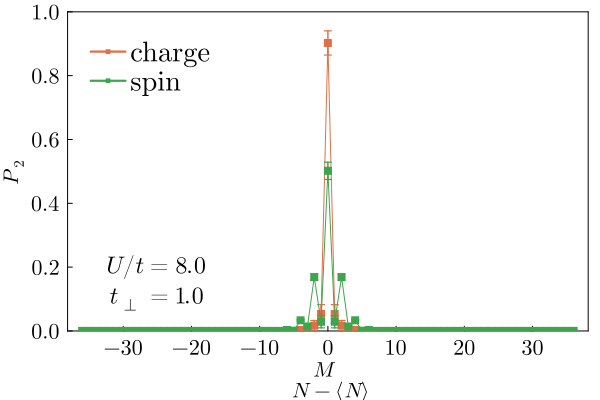

In [119]:
p1 = plot(
    -36:36, abs.(P2n_val[:, 3]), yerror=P2n_err[:, 3],
    label="charge",
    ylabel = L"P_2",
    #xticks=0:12:72,
    ylim=(0.0,1.0),
    lc=cur_colors[2], mc=cur_colors[2],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[2],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topright,
    foreground_color_legend = nothing
)

xlabel!(latexstring("\$M\$ \n \$N - \\langle N \\rangle\$"))
#p1 = twiny()
plot!(
    p1,
    -36:36, real(P2m_val[:, 3]), yerror=P2m_err[:, 3],
    label="spin",
    ylim=(0.0,1.0),
    lc=cur_colors[3], mc=cur_colors[3],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[3],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing,
)

annotate!(p1, -25, 0.20, text(L"U/t=8.0", 16))
annotate!(p1, -25, 0.10, text(L"t_{\perp}=1.0", 16))

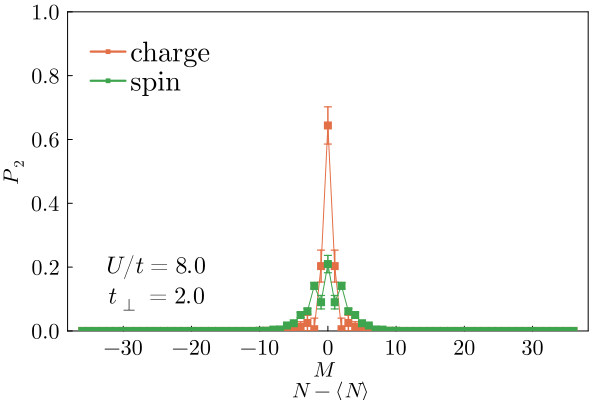

In [120]:
p2 = plot(
    -36:36, abs.(P2n_val[:, 4]), yerror=P2n_err[:, 4],
    label="charge",
    ylabel = L"P_2",
    #xticks=0:12:72,
    ylim=(0.0,1.0),
    lc=cur_colors[2], mc=cur_colors[2],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[2],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topright,
    foreground_color_legend = nothing
)

xlabel!(latexstring("\$M\$ \n \$N - \\langle N \\rangle\$"))
#p4 = twiny()
plot!(
    p2,
    -36:36, real(P2m_val[:, 4]), yerror=P2m_err[:, 4],
    label="spin",
    ylim=(0.0,1.0),
    lc=cur_colors[3], mc=cur_colors[3],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[3],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing,
)

annotate!(p2, -25, 0.20, text(L"U/t=8.0", 16))
annotate!(p2, -25, 0.10, text(L"t_{\perp}=2.0", 16))

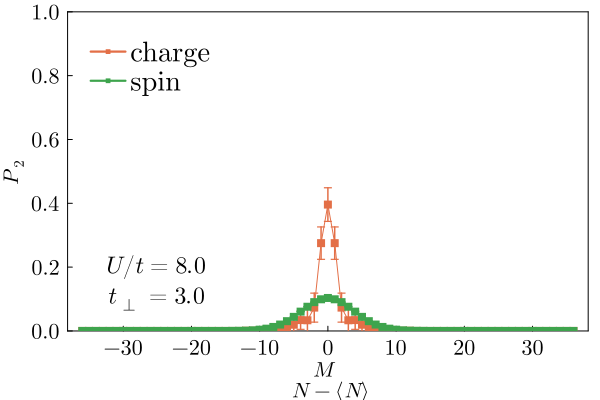

In [121]:
p3 = plot(
    -36:36, abs.(P2n_val[:, 5]), yerror=P2n_err[:, 5],
    label="charge",
    ylabel = L"P_2",
    #xticks=0:12:72,
    ylim=(0.0,1.0),
    lc=cur_colors[2], mc=cur_colors[2],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[2],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topright,
    foreground_color_legend = nothing
)

xlabel!(latexstring("\$M\$ \n \$N - \\langle N \\rangle\$"))

plot!(
    p3,
    -36:36, real(P2m_val[:, 5]), yerror=P2m_err[:, 5],
    label="spin",
    ylim=(0.0,1.0),
    lc=cur_colors[3], mc=cur_colors[3],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[3],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing,
)

annotate!(p3, -25, 0.20, text(L"U/t=8.0", 16))
annotate!(p3, -25, 0.10, text(L"t_{\perp}=3.0", 16))

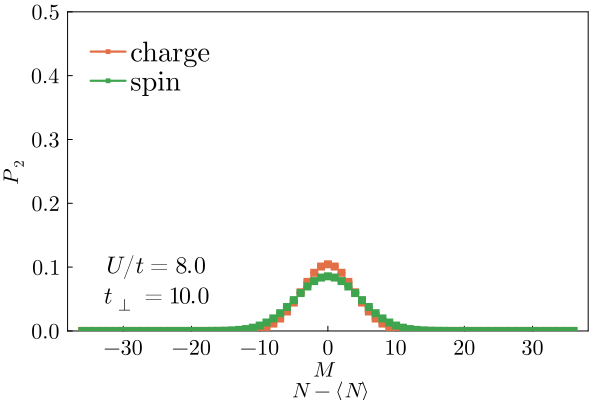

In [122]:
p4 = plot(
    -36:36, abs.(P2n_val[:, end]), yerror=P2n_err[:, end],
    label="charge",
    ylabel = L"P_2",
    #xticks=0:12:72,
    ylim=(0.0,1.0),
    lc=cur_colors[2], mc=cur_colors[2],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[2],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topright,
    foreground_color_legend = nothing
)

xlabel!(latexstring("\$M\$ \n \$N - \\langle N \\rangle\$"))

plot!(
    p4,
    -36:36, real(P2m_val[:, end]), yerror=P2m_err[:, end],
    label="spin",
    ylim=(0.0,0.5),
    lc=cur_colors[3], mc=cur_colors[3],
    marker=(:square, 4), 
    msw=1.5,
    msc=cur_colors[3],
    fontfamily="Computer Modern",
    legendfontsize = 18,
    guidefontsize = 14,
    tickfontsize = 14,
    framestyle=:box, grid=:false,
    legend=:topleft,
    foreground_color_legend = nothing,
)

annotate!(p4, -25, 0.10, text(L"U/t=8.0", 16))
annotate!(p4, -25, 0.05, text(L"t_{\perp}=10.0", 16))

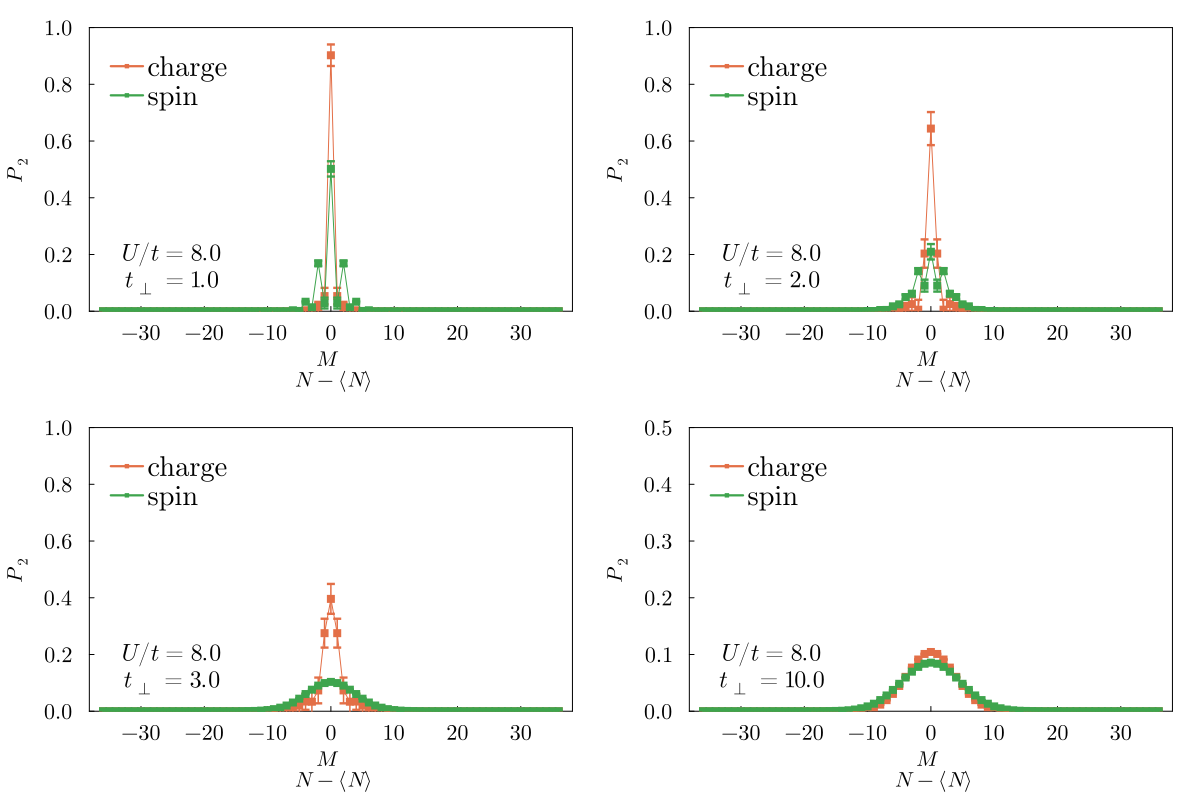

In [123]:
using Plots.PlotMeasures
p = plot(p1, p2, p3, p4, layout=(2,2), size=(1200,800), margin=5mm)

In [125]:
savefig("../figures/Pn2_bilayerHubbard_U8.0.pdf")
savefig("../figures/Pn2_bilayerHubbard_U8.0.svg")
savefig("../figures/Pn2_bilayerHubbard_U8.0.png")

"g:\\My Drive\\JuliaCode\\Plot\\plots-accessible-entanglement\\figures\\Pn2_bilayerHubbard_U8.0.png"